# Parte 1

NOTA: PRIMERO SE DEBE EJECUTAR LA PARTE 2. Luego la parte 1


Para comenzar, se tomaron las mediciones con el robot en ROS, y siguiendo el instructivo presente en el enunciado, se crean los archivos de texto odom.txt y scan.txt, con los datos de odometría y del sensor de barrido láser, respectivamente. Para poder poder trabajar con estos dos archivos, se deben subir a la carpeta "Archivos" presente en Colab.
Luego abrimos tanto odom.txt como scan.txt para poder hacer uso de los mismos:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'font.size': 12})
import math

with open("odom.txt") as odomf: #El archivo se asocia a la variable odomf.
  odom_lineas = odomf.readlines()

with open("scan.txt") as scanf:
  scan_lineas = scanf.readlines() #El archivo se asocia a la variable scanf.

Se utiliza el método readlines() para leer todas las líneas del archivo y se almacenan en una lista llamada odom_lineas. Cada línea del archivo se guarda como un elemento separado en la lista odom_lineas.

Este código te permite leer el contenido del archivo "odom.txt" línea por línea y almacenar esas líneas en la lista odom_lineas.

De igual manera aplica para el archivo scan.txt.

Luego, se codificó un script en Python presentado a continuación para cargar los datos del archivo scan.txt y así generar los gráficos en coordenadas polares de 3 barridos del sensor láser distribuidores de forma uniforme en el tiempo de simulación(al principio, a la mitad y al final).

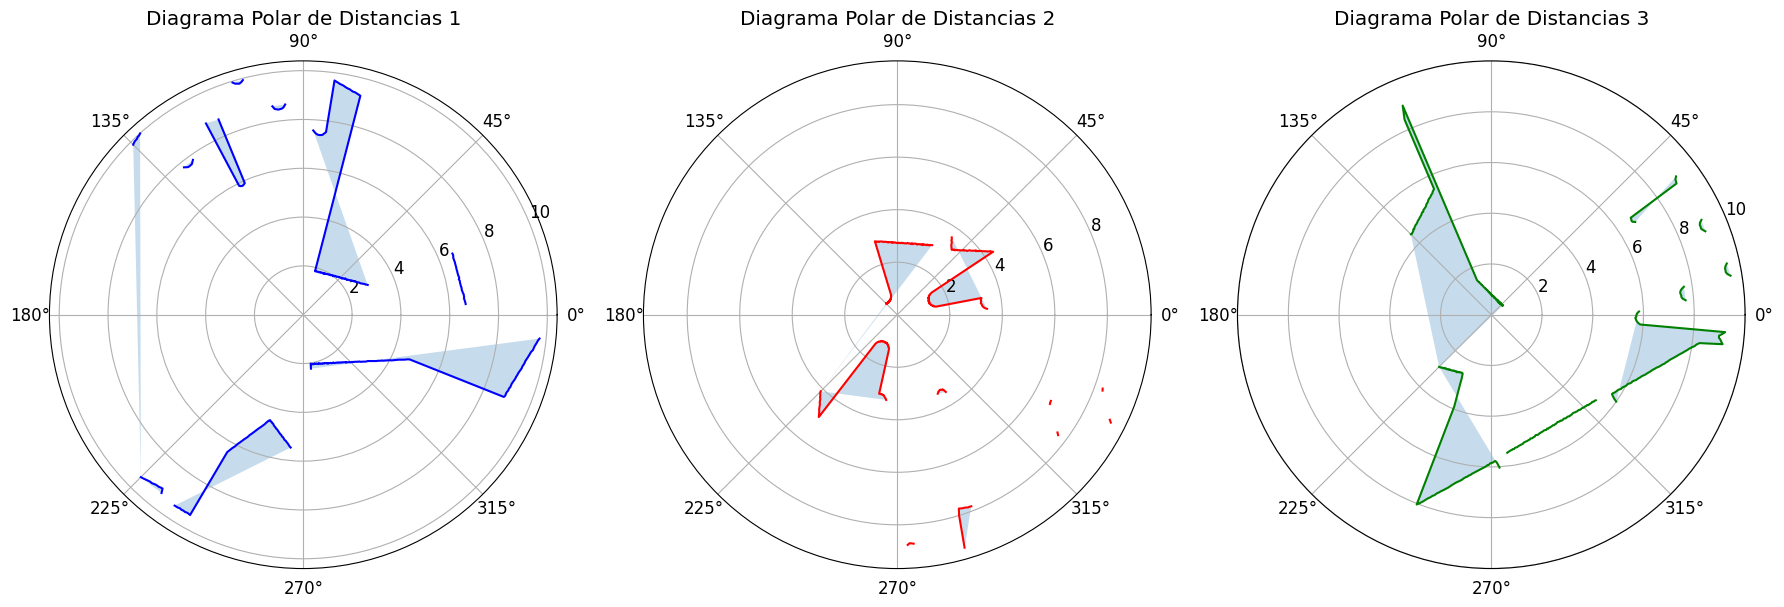

In [ ]:
distancia1=scan_lineas [1][1:]
distancia_float1 = np.array(distancia1, dtype=float)
angulos = np.deg2rad(np.linspace(-135, 135, len(distancia_float1)))

distancia2 = scan_lineas[1773][1:]
distancia_float2 = np.array(distancia2, dtype=float)
angulos = np.deg2rad(np.linspace(-135, 135, len(distancia_float2)))

distancia3 = scan_lineas[3456][1:]
distancia_float3 = np.array(distancia3, dtype=float)
angulos = np.deg2rad(np.linspace(-135, 135, len(distancia_float3)))

# Crear la figura y los ejes
fig = plt.figure(figsize=(18, 6))

# Primer gráfico polar
ax1 = fig.add_subplot(131, projection='polar')
ax1.plot(angulos, distancia_float1, 'b')
ax1.fill(angulos, distancia_float1, alpha=0.25)
ax1.set_title('Diagrama Polar de Distancias 1')

# Segundo gráfico polar
ax2 = fig.add_subplot(132, projection='polar')
ax2.plot(angulos, distancia_float2, 'r')
ax2.fill(angulos, distancia_float2, alpha=0.25)
ax2.set_title('Diagrama Polar de Distancias 2')

# Tercer gráfico polar
ax3 = fig.add_subplot(133, projection='polar')
ax3.plot(angulos, distancia_float3, 'g')
ax3.fill(angulos, distancia_float3, alpha=0.25)
ax3.set_title('Diagrama Polar de Distancias 3')

# Ajustar los espacios entre los gráficos
fig.tight_layout()

# Mostrar los gráficos
plt.show()

# Parte 2

Para asociar un conjunto de datos  de timestamp de odometría que se encuentren más próximos a un valor de timesamp de scan laser, al igual que el punto anterior, tomamos el conjunto de lineas que forman cada archivo. Hacemos uso de las ya explicadas vatiables odom_lineas y scan_lineas.Una vez que cada linea de texto se guarda en una lista tenemos un conjunto de lineas con el siguiente formato.

In [ ]:
print(odom_lineas[1])


Paso siguiente se obtiene cada valor por separado para poder elaborar los distintos algoritomos.Para ello se busca modificar la lista odom_lineas y odom_scan de forma tal que sean listas bidimensionales, es decir, que todos los valores de timesamp seran encontrados accediendo con el indice [n][0] donde n sera el valor que representa a una linea especifica de texto albergada.

In [ ]:
len_odom_lineas=len(odom_lineas) #Calcula la longitud de la lista odom_lineas y guarda el resultado en la variable len_odom_lineas.
print(len_odom_lineas)

8867


In [ ]:
print(odom_lineas[0]) #Se imprime el primer elemento de la lista

In [ ]:
for x in range(len_odom_lineas):
  odom_lineas[x]=odom_lineas[x].split("\t") #Divide cada elemento de la lista en subcadenas utilizando el tab.


Ahora odom_lineas es un arreglo bidimensional del tipo [x][i] donde x representa la linea del archivo txt e i la columna, por ejemplo todos los [x][0] representan los timestap. Repetimos el proceso para el archivo scan.txt

In [ ]:
len_scan_lineas=len(scan_lineas)
for x in range(len_scan_lineas):
  scan_lineas[x]=scan_lineas[x].split("\t")


In [ ]:
print(scan_lineas[8][2])

Dado el tiempo de muestreo existen para un mismo tiempo de simulación muchas mas muestras de un sensor que de otro.
$T_{scan} > T_{odom}$ \
Esto se verifica corroborando la cantidad de datos que existen de un sensor y de otro.

In [ ]:
print(len_odom_lineas)
print(len_scan_lineas)
print(len_odom_lineas/len_scan_lineas)

Esto quiere decir que para cada valor de scan existen entre 2 y 3 valores de odom cercanos. Por cada valor de scan debemos analizar 3 valores cercanos y elegir cual tomaremos como muestra simultanea.
Particularmente sabemos que los valores de timesamp tienen el mismo incio y el mismo final ya que se han registrado los valores durante el mismo tiempo, es decirq que solo debemos recorrer una arreglo y comparar un timesamp de scan con dos valores subsiguientes de odom, una vez que el segundo valor se encuentre mas cerca todos los timesamp subsiguientes seran asociados a ese timesamp.

Ahora convertimos todos los valores a flotantes.

In [ ]:
l1=[] #lista temporal que almacena todos los valores asociados a un timesamp de scan
asc_values=[] #es una lista donde se guardan los valores asociados. Los valores asociados al timesamp de scan_lineas[n][0] se alamcenan en asc_values[n]
i=0
for j in range(len_scan_lineas): #recorremos todos los timesamp de scan y comparamos un valor de odom con el valor timesamp de scan[n] y scan[n+1]
  #convertimos los valores odom[n], scan[n] y scan[n+1] en float
  a=float(scan_lineas[i][0])
  b=float(odom_lineas[j][0])
  c=float(scan_lineas[i+1][0])
  print(a,b,c)
  #comparamos si odom[n] esta mas cerca de scan[n] o scan[n]+1
  print(abs(a-b))
  print(abs(c-b))
  #si odom[n] esta mas cerca de scan[n] el valor se agrega a la lista temporal.
  if(abs(a-b)<= abs(c-b)):
    print("el valor "+ str(a) + " es el mas cercano")
    l1.append(b)
    print(l1)
  else:
    print("el valor "+str(c)+ " es el mas cercano")
    #si el valor mas cercano a odom[n] es scan[n+1] se agregan todos los valores de la lista temporal a asc_values. Se limpia la lista y se inicia la lista nueva con este valor
    #se incrementa n en +1 y se analiza el dato siguiente de scan. Asi hasta asociar todos los valores
    asc_values.append(l1[:])
    l1[:] = []
    l1.append(b)
    i=i+1


Luego, tomamos 5 valores de timesamp de scan y graficamos todos su valores asociados.
En verde el timesamp de scan en rojo y azul los valores timesamp de odom asociados. Los valores rojos se asocian al primer valor, los azules al segundo, los siguientes rojos al tercero, los siguientes azules al cuarto y asi sucesivamente.

9


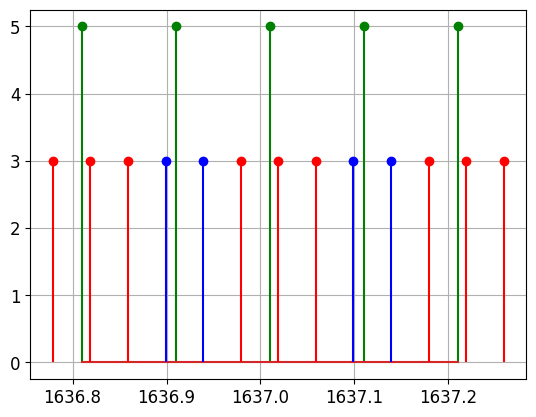

In [16]:
x = []
for w in range(100,105):
  x.append(float(scan_lineas [w][0]))
y = [5]*len(x)
plt.stem(x,y,linefmt='g')

x1=[]
y1=[]
color=['r','b','r','b','r','b','r','b','r']
print(len(color))
for j in range(100,105):
  for i in range(len(asc_values [j])):
    x1=float(asc_values [j][i])
    y1=3
    plt.stem(x1,y1,linefmt=color[j-100])
plt.grid()


# Parte 3


En primera instancia, se utiliza la librería Pandas para poder acceder a los datos de los archivos.

En `df_odom` se almacena la pose del robot y su velocidad lineal y angular instantáneas, además del timestamp de cada medición:

In [ ]:
# Carga de datos de odometría
df_odom = pd.read_csv('odom.txt', header = None, delim_whitespace=True )
df_odom.columns = ['tiempo', 'posX', 'posY', 'ang', 'vLin', 'vAng']

# Carga de datos del scanner
df_scan = pd.read_csv('scan.txt', header = None, delim_whitespace=True )
df_scan.rename(columns = {0:'tiempo'}, inplace = True)

# Lleva tiempos iniciales a 0
t_inicial = min((df_scan['tiempo'][0], df_odom['tiempo'][0]))
df_scan['tiempo'] = df_scan['tiempo'] - t_inicial
df_odom['tiempo'] = df_odom['tiempo'] - t_inicial

Como el ángulo para el cual se realiza cada una de las 540 mediciones está implícito en su posición dentro del vector, es necesario generar un vector de ángulos para poder graficar estos datos sobre un diagrama polar.

In [ ]:
start = -3/4*np.pi
stop = 3/4*np.pi
step = 3/2*np.pi/540

ang_medicion = np.arange(start, stop, step)

Si bien los datos del sensor de barrido láser, nos dan una idea de la topología del entorno, puede que no resulten suficientes a la hora de realizar un mapeo completo, lo que también puede ocasionar cierto ruido en el mapa. Esto se debe a que sus mediciones solo están referidas al sistemas de coordenadas del propio láser $L$.

Como se tienen disponibles los datos de odometría, es posible combinar las mediciones láser con estos últimos y de obtener un mapeo del entorno referido al marco de referencia global $G$.

Como la frecuencia con que se con que se envían los datos de odometría es mayor a la frecuencia con la que se envían los datos de barrido láser, es necesario filtrar los datos de odometría, para quedarse solo con aquel cuyo timestamp sea el más cercano al timestamp de medición láser. Esto se realiza con el método `.get_indexer` pasándole el parámetro `method='nearest'`

In [ ]:
t_odom = df_odom['tiempo']
t_scan = df_scan['tiempo']

indexes = pd.Index(t_odom).get_indexer(t_scan, method='nearest')
df_odom_filtered = df_odom.iloc[indexes].reset_index(drop=True)  #dataframe odometría filtrado
t_odom_f = df_odom_filtered['tiempo']

Como se mencionó anteriormente, para la construcción del mapa se pretende expresar las mediciones láser en el marco de referencia global $G$. Para ello, es necesario obtener la matriz de transformación $^{\!L}_{G}T$. Se debe tener en cuenta que el marco de referencia del láser, solo está desplazado en $z$ respecto del marco de referencia $R$ del robot, mientras que sigue alineado en $x$ e $y$.

$$
^{\!L}_{G}T = \begin{bmatrix}
                                    ^{\!L}_{G}A & ^{\!L}\mathbf{p}\\
                                    0 & 1
                                    \end{bmatrix}
$$

Donde $^{\!L}_{\mathcal{O}}A$ es la matriz de rotación y $^{\!L}\mathbf{p}$ es la traslación.



$$
^{\!L}_{\mathcal{G}}A = \begin{bmatrix}
                                      cos(\theta) & -sin(\theta) \\
                                      sin(\theta) & cos(\theta)
                                  \end{bmatrix}
$$

$$
^{\!L}\mathbf{p} = \begin{bmatrix}
                                      x \\
                                      y
                                  \end{bmatrix}
$$






De la siguiente forma, se obtendrá un punto $^{\!G}p$ a partir de un punto $^{\!L}p$:

$$
^{\!G}p = \: ^{\!L}_{G}A \cdot \: ^{\!L}p + ^{\!L}\mathbf{p}
$$

A continuación, se presenta un script que realiza el mapeo previamente propuesto y genera un vector `Pg` con los puntos mapeados en coordenadas rectangulares.

In [ ]:
if 0:
    Pg = np.empty(0)
    for i in range(0, len(df_scan)):
        # se calcula la matriz de rotación
        ang = df_odom_filtered.iloc[i]['ang']
        R_matrix = np.array([[math.cos(ang), -1*math.sin(ang)],
                             [math.sin(ang), math.cos(ang)]])

        # se calcula la matriz de traslación
        T = np.array([[df_odom_filtered.iloc[i]['posX']],
                      [df_odom_filtered.iloc[i]['posY']]])

        # se pasa de coordenadas polares a rectangulares
        xr = df_scan.iloc[i,1:]*np.cos(ang_medicion)
        yr = df_scan.iloc[i,1:]*np.sin(ang_medicion)

        for j in range(0, len(ang_medicion)):
            if xr.iloc[j] <= 10 and yr.iloc[j] <= 10:
                Pr = np.array([[xr.iloc[j]],      # punto medición laser en coordenadas del robot
                               [yr.iloc[j]]])
                Proted = np.matmul(R_matrix, Pr)
                Pg_j = np.add(Proted, T)          # punto medición laser en coordenadas globales

                if len(Pg) == 0:
                    Pg = Pg_j
                else:
                    Pg = np.append(Pg, Pg_j, axis=1) # puntos transformados en coord rect glboales

xg = pd.Series([])
yg = pd.Series([])
for i in range(0, len(df_odom_filtered)):
    ang_medicion_g = ang_medicion + df_odom_filtered.iloc[i]['ang']
    x = df_scan.iloc[i,1:]*np.cos(ang_medicion_g) + df_odom_filtered.iloc[i]['posX']
    y = df_scan.iloc[i,1:]*np.sin(ang_medicion_g) + df_odom_filtered.iloc[i]['posY']
    xg = pd.concat([xg, x], ignore_index=True)
    yg = pd.concat([yg, y], ignore_index=True)

<ipython-input-12-e4176bc37c56>:29: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  xg = pd.Series([])
<ipython-input-12-e4176bc37c56>:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  yg = pd.Series([])


En la figura 4 se muestra el entorno del mapa y el recorrido hecho por el robot:

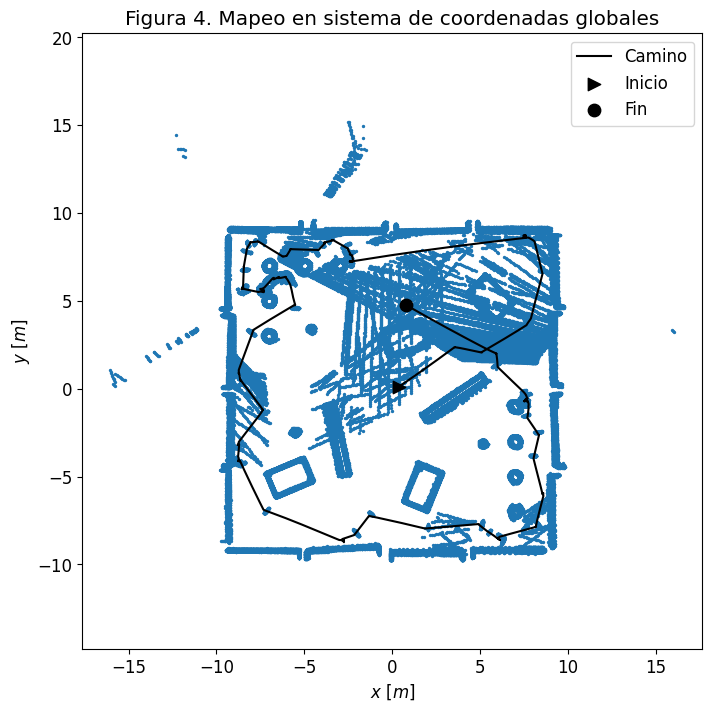

In [ ]:
plt.subplots(figsize=(8, 8));
plt.scatter(xg, yg, s=2)
plt.plot(df_odom['posX'], df_odom['posY'], c='black', label='Camino')
plt.scatter(df_odom['posX'].iloc[0], df_odom['posY'].iloc[0], c='black', s=80, marker=">", label='Inicio')
plt.scatter(df_odom['posX'].iloc[-1], df_odom['posY'].iloc[-1], c='black', s=80, label='Fin')
plt.axis('equal')
plt.legend()
plt.xlabel('$x$ [$m$]')
plt.ylabel('$y$ [$m$]')
plt.title('Figura 4. Mapeo en sistema de coordenadas globales')
plt.show()

#Parte 4

De igual forma como se procedió en la parte 3, se procede en esta parte pero teniendo en cuenta que se utiliza el robot RomAA real con el sensor de barrido láser para así obtener el mapa del entorno. Utilizando los archivos odom3.txt y scan3.txt podemos observar la rotación del robot sobre su propio eje, sin desplazamiento alguguno, entonces lo que vemos en la imagen es un círculo limitado por la pared, y el ruido que podemos ver en la imagen es porque nos encontrabamos moviéndonos constantemente durante la medición. En estos casos, las mediciones realizadas son 811, por lo que cambia el ángulo de medición.

<ipython-input-14-c31f6d2d4cb3>:60: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  xg = pd.Series([])
<ipython-input-14-c31f6d2d4cb3>:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  yg = pd.Series([])


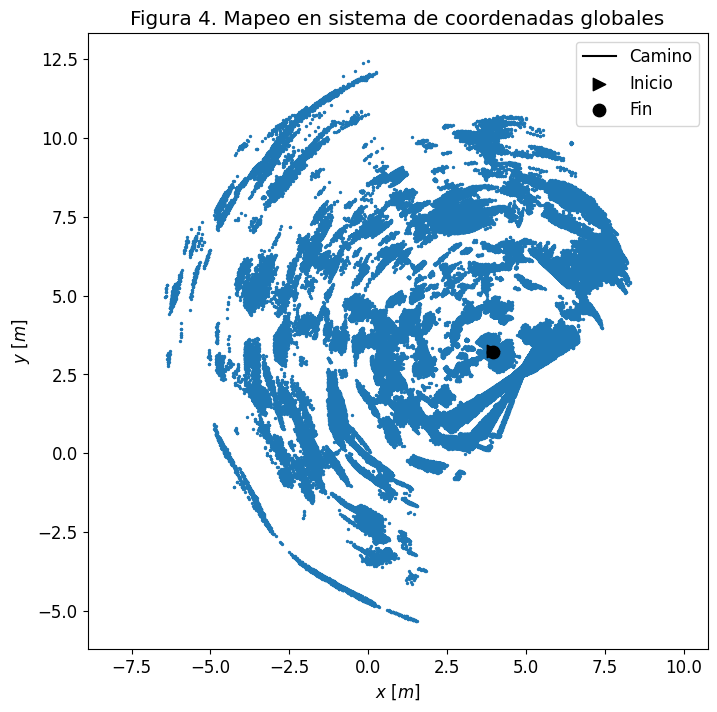

In [ ]:
# Carga de datos de odometría
df_odom = pd.read_csv('odom3.txt', header = None, delim_whitespace=True )
df_odom.columns = ['tiempo', 'posX', 'posY', 'ang', 'vLin', 'vAng']

# Carga de datos del scanner
df_scan = pd.read_csv('scan3.txt', header = None, delim_whitespace=True )
df_scan.rename(columns = {0:'tiempo'}, inplace = True)

# Lleva tiempos iniciales a 0
t_inicial = min((df_scan['tiempo'][0], df_odom['tiempo'][0]))
df_scan['tiempo'] = df_scan['tiempo'] - t_inicial
df_odom['tiempo'] = df_odom['tiempo'] - t_inicial



start = -3/4*np.pi
stop = 3/4*np.pi
step = 3/2*np.pi/811

ang_medicion = np.arange(start, stop, step)


t_odom = df_odom['tiempo']
t_scan = df_scan['tiempo']

indexes = pd.Index(t_odom).get_indexer(t_scan, method='nearest')
df_odom_filtered = df_odom.iloc[indexes].reset_index(drop=True)  #dataframe odometría filtrado
t_odom_f = df_odom_filtered['tiempo']


if 0:
    Pg = np.empty(0)
    for i in range(0, len(df_scan)):
        # se calcula la matriz de rotación
        ang = df_odom_filtered.iloc[i]['ang']
        R_matrix = np.array([[math.cos(ang), -1*math.sin(ang)],
                             [math.sin(ang), math.cos(ang)]])

        # se calcula la matriz de traslación
        T = np.array([[df_odom_filtered.iloc[i]['posX']],
                      [df_odom_filtered.iloc[i]['posY']]])

        # se pasa de coordenadas polares a rectangulares
        xr = df_scan.iloc[i,1:]*np.cos(ang_medicion)
        yr = df_scan.iloc[i,1:]*np.sin(ang_medicion)

        for j in range(0, len(ang_medicion)):
            if xr.iloc[j] <= 10 and yr.iloc[j] <= 10:
                Pr = np.array([[xr.iloc[j]],      # punto medición laser en coordenadas del robot
                               [yr.iloc[j]]])
                Proted = np.matmul(R_matrix, Pr)
                Pg_j = np.add(Proted, T)          # punto medición laser en coordenadas globales

                if len(Pg) == 0:
                    Pg = Pg_j
                else:
                    Pg = np.append(Pg, Pg_j, axis=1) # puntos transformados en coord rect glboales


xg = pd.Series([])
yg = pd.Series([])
for i in range(0, len(df_odom_filtered)):
    ang_medicion_g = ang_medicion + df_odom_filtered.iloc[i]['ang']
    x = df_scan.iloc[i,1:]*np.cos(ang_medicion_g) + df_odom_filtered.iloc[i]['posX']
    y = df_scan.iloc[i,1:]*np.sin(ang_medicion_g) + df_odom_filtered.iloc[i]['posY']
    xg = pd.concat([xg, x], ignore_index=True)
    yg = pd.concat([yg, y], ignore_index=True)



plt.subplots(figsize=(8, 8));
plt.scatter(xg, yg, s=2)
plt.plot(df_odom['posX'], df_odom['posY'], c='black', label='Camino')
plt.scatter(df_odom['posX'].iloc[0], df_odom['posY'].iloc[0], c='black', s=80, marker=">", label='Inicio')
plt.scatter(df_odom['posX'].iloc[-1], df_odom['posY'].iloc[-1], c='black', s=80, label='Fin')
plt.axis('equal')
plt.legend()
plt.xlabel('$x$ [$m$]')
plt.ylabel('$y$ [$m$]')
plt.title('Figura 4. Mapeo en sistema de coordenadas globales')
plt.show()

En el siguiente caso, podemos notar en el recorrido que el robot se encuentra dentro del laboratorio y se realiza cierto desplazamiento en base a óbstaculos que se encuentran en el camino, como sillas por ejemplom, y el ruido que podemos notar en la imagen se debe no solo a movimientos nuestros dentro del laboratorio sino al error que trae con sí mismo el sensor.

<ipython-input-15-e679ae15b71d>:66: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  xg = pd.Series([])
<ipython-input-15-e679ae15b71d>:67: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  yg = pd.Series([])


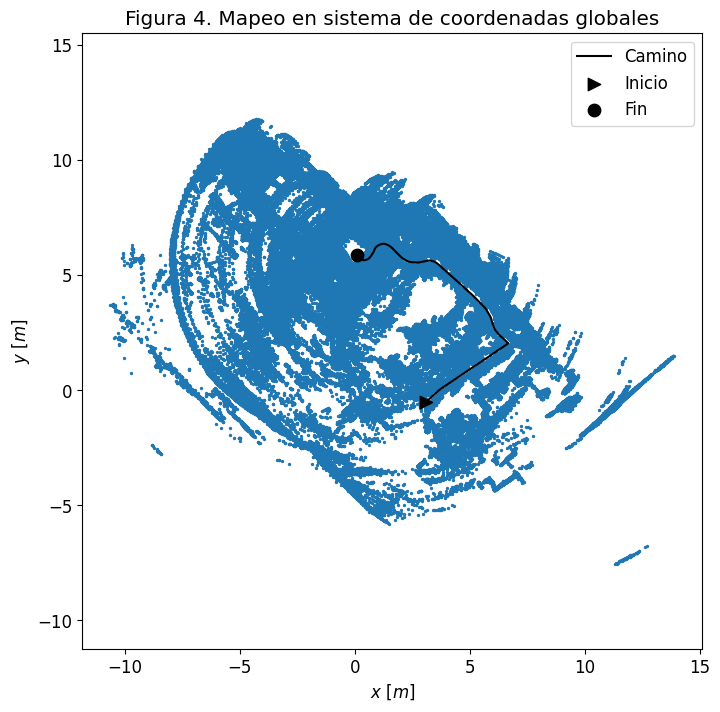

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import math

# Carga de datos de odometría
df_odom = pd.read_csv('odom2.txt', header = None, delim_whitespace=True )
df_odom.columns = ['tiempo', 'posX', 'posY', 'ang', 'vLin', 'vAng']

# Carga de datos del scanner
df_scan = pd.read_csv('scan2.txt', header = None, delim_whitespace=True )
df_scan.rename(columns = {0:'tiempo'}, inplace = True)

# Lleva tiempos iniciales a 0
t_inicial = min((df_scan['tiempo'][0], df_odom['tiempo'][0]))
df_scan['tiempo'] = df_scan['tiempo'] - t_inicial
df_odom['tiempo'] = df_odom['tiempo'] - t_inicial



start = -3/4*np.pi
stop = 3/4*np.pi
step = 3/2*np.pi/811

ang_medicion = np.arange(start, stop, step)


t_odom = df_odom['tiempo']
t_scan = df_scan['tiempo']

indexes = pd.Index(t_odom).get_indexer(t_scan, method='nearest')
df_odom_filtered = df_odom.iloc[indexes].reset_index(drop=True)  #dataframe odometría filtrado
t_odom_f = df_odom_filtered['tiempo']


if 0:
    Pg = np.empty(0)
    for i in range(0, len(df_scan)):
        # se calcula la matriz de rotación
        ang = df_odom_filtered.iloc[i]['ang']
        R_matrix = np.array([[math.cos(ang), -1*math.sin(ang)],
                             [math.sin(ang), math.cos(ang)]])

        # se calcula la matriz de traslación
        T = np.array([[df_odom_filtered.iloc[i]['posX']],
                      [df_odom_filtered.iloc[i]['posY']]])

        # se pasa de coordenadas polares a rectangulares
        xr = df_scan.iloc[i,1:]*np.cos(ang_medicion)
        yr = df_scan.iloc[i,1:]*np.sin(ang_medicion)

        for j in range(0, len(ang_medicion)):
            if xr.iloc[j] <= 10 and yr.iloc[j] <= 10:
                Pr = np.array([[xr.iloc[j]],      # punto medición laser en coordenadas del robot
                               [yr.iloc[j]]])
                Proted = np.matmul(R_matrix, Pr)
                Pg_j = np.add(Proted, T)          # punto medición laser en coordenadas globales

                if len(Pg) == 0:
                    Pg = Pg_j
                else:
                    Pg = np.append(Pg, Pg_j, axis=1) # puntos transformados en coord rect glboales


xg = pd.Series([])
yg = pd.Series([])
for i in range(0, len(df_odom_filtered)):
    ang_medicion_g = ang_medicion + df_odom_filtered.iloc[i]['ang']
    x = df_scan.iloc[i,1:]*np.cos(ang_medicion_g) + df_odom_filtered.iloc[i]['posX']
    y = df_scan.iloc[i,1:]*np.sin(ang_medicion_g) + df_odom_filtered.iloc[i]['posY']
    xg = pd.concat([xg, x], ignore_index=True)
    yg = pd.concat([yg, y], ignore_index=True)



plt.subplots(figsize=(8, 8));
plt.scatter(xg, yg, s=2)
plt.plot(df_odom['posX'], df_odom['posY'], c='black', label='Camino')
plt.scatter(df_odom['posX'].iloc[0], df_odom['posY'].iloc[0], c='black', s=80, marker=">", label='Inicio')
plt.scatter(df_odom['posX'].iloc[-1], df_odom['posY'].iloc[-1], c='black', s=80, label='Fin')
plt.axis('equal')
plt.legend()
plt.xlabel('$x$ [$m$]')
plt.ylabel('$y$ [$m$]')
plt.title('Figura 4. Mapeo en sistema de coordenadas globales')
plt.show()